In [1]:
fn = 'insect_p450.txt'

In [2]:
sum(1 for line in open(fn))

5357

In [3]:
for i, line in enumerate(open(fn)):
    print (i, line)
    if i > 100:
        break

(0, 'Blattodea\t[Blattella germanica]\tCYP15A1\t1\n')
(1, 'Blattodea\t[Diploptera punctata]\tCYP15A1\t1\n')
(2, 'Blattodea\t[Diploptera punctata]\tCYP9E1\t1\n')
(3, 'Blattodea\t[Blaberus discoidalis]\tCYP4C1\t1\n')
(4, 'Blattodea\t[Blattella germanica]\tCYP4G19\t1\n')
(5, 'Blattodea\t[Blattella germanica]\tCYP4C1\t2\n')
(6, 'Blattodea\t[Blattella germanica]\tCYP9E2\t1\n')
(7, 'Blattodea\t[Blattella germanica]\tCYP6K1\t1\n')
(8, 'Blattodea\t[Blattella germanica]\tCYP6J1\t1\n')
(9, 'Blattodea\t[Blattella germanica]\tCYP6L1\t1\n')
(10, 'Blattodea\t[Diploptera punctata]\tCYP4C1\t1\n')
(11, 'Blattodea\t[Diploptera punctata]\tCYP4C5\t1\n')
(12, 'Blattodea\t[Diploptera punctata]\tCYP4C4\t1\n')
(13, 'Blattodea\t[Diploptera punctata]\tCYP4C3\t1\n')
(14, 'Coleoptera\t[Anoplophora glabripennis]\tCYP12H2\t2\n')
(15, 'Coleoptera\t[Anoplophora glabripennis]\tCYP9D4\t1\n')
(16, 'Coleoptera\t[Anoplophora glabripennis]\tCYP4V18\t1\n')
(17, 'Coleoptera\t[Anoplophora glabripennis]\tCYP6M11\t6\n')
(18, 'C

In [4]:
cnt_insect_prot = {}
for i, line in enumerate(open(fn)):
    insect_ord, insect_spe, cyp, cnt = line.strip().split('\t')
    if not cnt_insect_prot.has_key(insect_ord):
        cnt_insect_prot.update({insect_ord:0})
    cnt_insect_prot[insect_ord] += int(cnt)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import locale
def draw_pie_chart(title, dictionary):
    locale.setlocale(locale.LC_NUMERIC,'ja_JP')
    total = np.sum(dictionary.values())
    labels = []
    sizes = []
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'orange'] * (len(dictionary) / 5)
    for k, v in sorted(dictionary.items(), key=lambda x:x[1]):
        sizes.append(v)
        if v < (total * 0.02):
            labels.append('')
        else:
            label = "{0}, {1}".format(k, locale.format('%d', v, True))
            labels.append(label)
    plt.pie(sizes, labels=labels, colors=colors, 
            #autopct='%1.1f%%', 
            autopct=lambda p: '{:.1f}%'.format(p) if p >= 2 else '',
            #counterclock=False,
            shadow=False, startangle=90)
    plt.axis('equal')
    plt.title(title)
    plt.show()

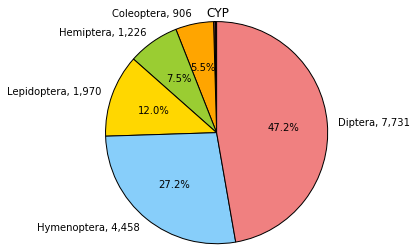

In [6]:
draw_pie_chart("CYP", cnt_insect_prot)

In [7]:
lst_insect_spe = {}
for i, line in enumerate(open(fn)):
    insect_ord, insect_spe, cyp, cnt = line.strip().split('\t')
    if not lst_insect_spe.has_key(insect_ord):
        lst_insect_spe.update({insect_ord:[]})
    if insect_spe not in lst_insect_spe[insect_ord]:
        lst_insect_spe[insect_ord].append(insect_spe)

In [8]:
cnt_insect_spe = {}
for k in lst_insect_spe:
    print (k, len(lst_insect_spe[k]))
    cnt_insect_spe.update({k: len(lst_insect_spe[k])})

('Blattodea', 3)
('Hemiptera', 25)
('Lepidoptera', 42)
('Coleoptera', 23)
('Psocodea', 2)
('Orthoptera', 3)
('Hymenoptera', 50)
('Thysanoptera', 2)
('Diptera', 72)


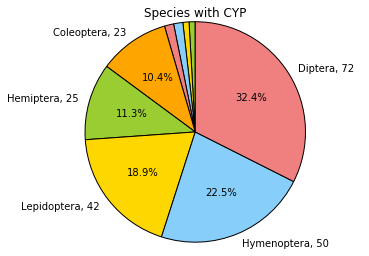

In [9]:
draw_pie_chart("Species with CYP", cnt_insect_spe)

In [10]:
lst_insect_genus = {}
for i, line in enumerate(open(fn)):
    insect_ord, insect_spe, cyp, cnt = line.strip().split('\t')
    insect_genus = insect_spe.split()[0]
    if not lst_insect_genus.has_key(insect_ord):
        lst_insect_genus.update({insect_ord:[]})
    if insect_genus not in lst_insect_genus[insect_ord]:
        lst_insect_genus[insect_ord].append(insect_genus)
cnt_insect_genus = {}
for k in lst_insect_genus:
    print (k, len(lst_insect_genus[k]))
    cnt_insect_genus.update({k: len(lst_insect_genus[k])})

('Blattodea', 3)
('Hemiptera', 20)
('Lepidoptera', 29)
('Coleoptera', 17)
('Psocodea', 1)
('Orthoptera', 2)
('Hymenoptera', 33)
('Thysanoptera', 2)
('Diptera', 20)


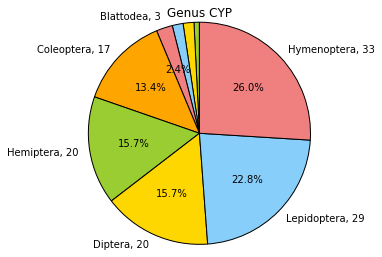

In [11]:
draw_pie_chart("Genus CYP", cnt_insect_genus)

In [12]:
cypd = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, cyp, cnt = line.strip().split('\t')
    if not cypd.has_key(cyp):
        cypd.update({cyp:0})
    cypd[cyp] += int(cnt)

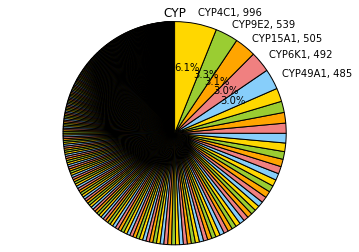

In [13]:
draw_pie_chart("CYP", cypd)

In [14]:
import re
cypd = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, cyp, cnt = line.strip().split('\t')
    cyp = re.sub(r'\d+$', '', cyp)
    if not cypd.has_key(cyp):
        cypd.update({cyp:0})
    cypd[cyp] += int(cnt)

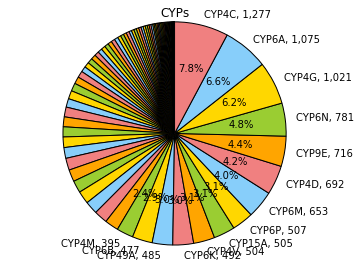

In [15]:
draw_pie_chart("CYPs", cypd)

In [16]:
import re
cypd = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, cyp, cnt = line.strip().split('\t')
    cyp = re.sub(r'[A-Z]\d+$', '', cyp)
    if not cypd.has_key(cyp):
        cypd.update({cyp:0})
    cypd[cyp] += int(cnt)

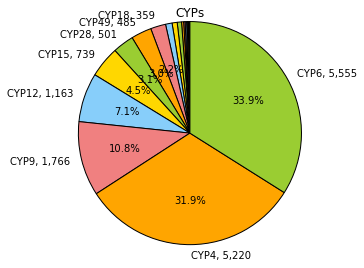

In [17]:
draw_pie_chart("CYPs", cypd)

In [18]:
import re
cypd1 = {}
cypd2 = {}
cypd3 = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, cyp, cnt = line.strip().split('\t')
    cyp1 = re.sub(r'[A-Z]\d+$', '', cyp)
    cyp2 = re.sub(r'\d+$', '', cyp)
    if not cypd1.has_key(cyp1):
        cypd1.update({cyp1:0})
    cypd1[cyp1] += int(cnt)
    if not cypd2.has_key(cyp2):
        cypd2.update({cyp2:0})
    cypd2[cyp2] += int(cnt)
    if not cypd3.has_key(cyp):
        cypd3.update({cyp:0})
    cypd3[cyp] += int(cnt)

In [19]:
def draw_pie_chart2(title, dictionary):
    locale.setlocale(locale.LC_NUMERIC,'ja_JP')
    total = np.sum(dictionary.values())
    labels = []
    sizes = []
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'orange'] * (len(dictionary) / 5)
    for k, v in sorted(dictionary.items(), key=lambda x:x[1], reverse=True):
        sizes.append(v)
        if v < (total * 0.02):
            labels.append('')
        else:
            label = "{0}, {1}".format(k, locale.format('%d', v, True))
            labels.append(label)
    plt.pie(sizes, labels=labels, colors=colors, 
            labeldistance=0.5,
            #autopct='%1.1f%%', 
            #autopct=lambda p: '{:.1f}%'.format(p) if p >= 2 else '',
            counterclock=False,
            shadow=False, startangle=90)
    plt.axis('equal')
    plt.title(title)
    #plt.show()

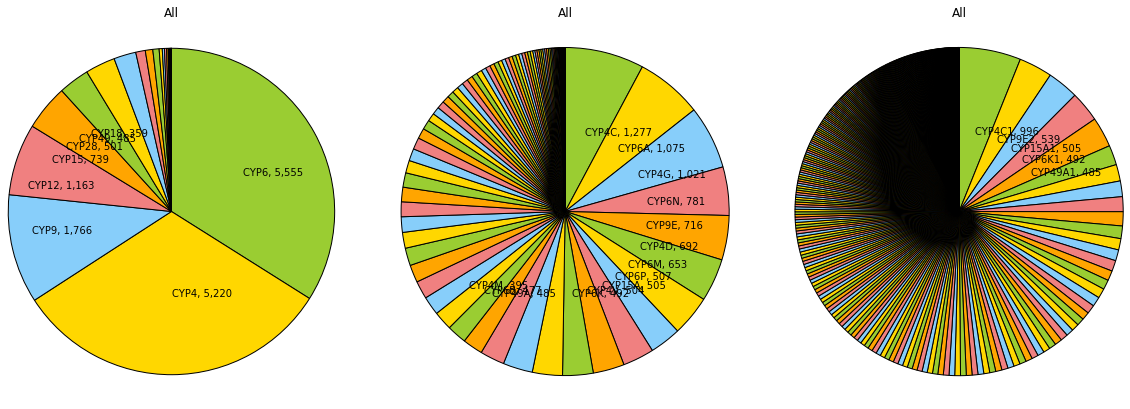

In [20]:
plt.figure(figsize=(20,15))
plt.subplot(2, 3, 1)
draw_pie_chart2("All", cypd1)
plt.subplot(2, 3, 2)
draw_pie_chart2("All", cypd2)
plt.subplot(2, 3, 3)
draw_pie_chart2("All", cypd3)

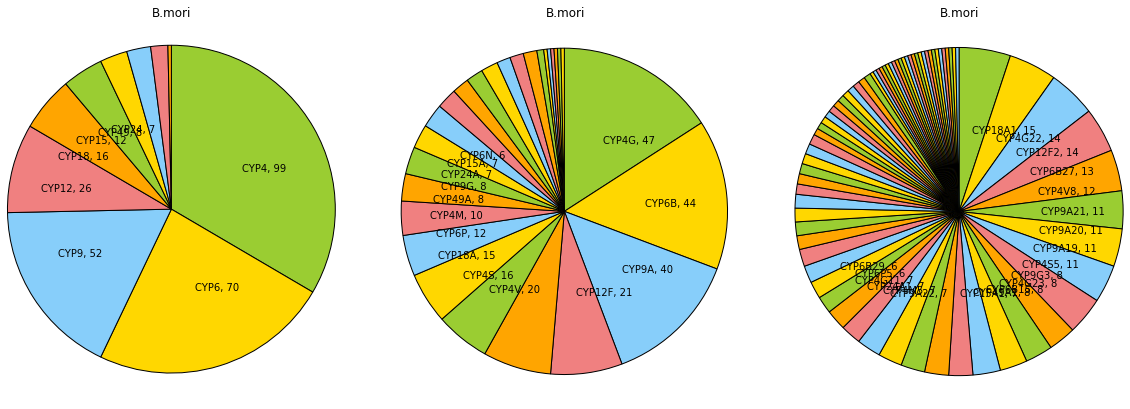

In [21]:
import re
cypd1 = {}
cypd2 = {}
cypd3 = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, cyp, cnt = line.strip().split('\t')
    if insect_spe != "[Bombyx mori]":
        continue
    cyp1 = re.sub(r'[A-Z]\d+$', '', cyp)
    cyp2 = re.sub(r'\d+$', '', cyp)
    if not cypd1.has_key(cyp1):
        cypd1.update({cyp1:0})
    cypd1[cyp1] += int(cnt)
    if not cypd2.has_key(cyp2):
        cypd2.update({cyp2:0})
    cypd2[cyp2] += int(cnt)
    if not cypd3.has_key(cyp):
        cypd3.update({cyp:0})
    cypd3[cyp] += int(cnt)

plt.figure(figsize=(20,15))
plt.subplot(2, 3, 1)
draw_pie_chart2("B.mori", cypd1)
plt.subplot(2, 3, 2)
draw_pie_chart2("B.mori", cypd2)
plt.subplot(2, 3, 3)
draw_pie_chart2("B.mori", cypd3)

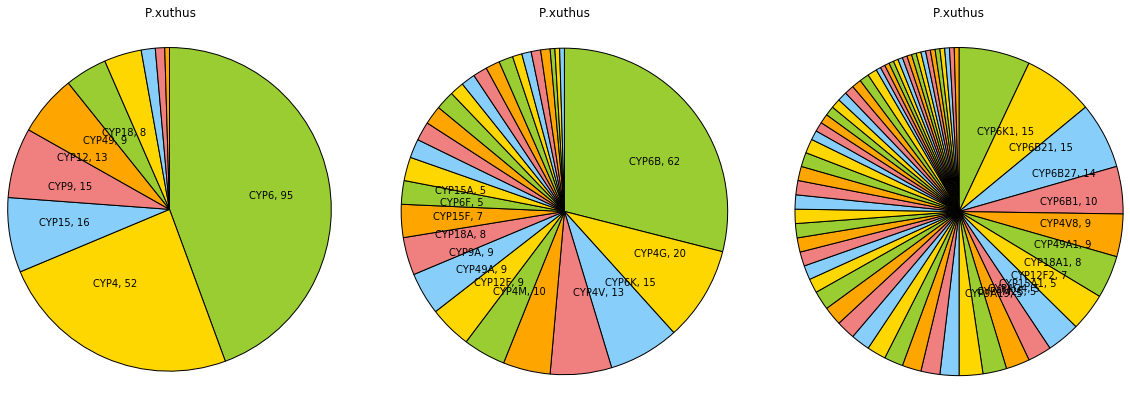

In [22]:
import re
cypd1 = {}
cypd2 = {}
cypd3 = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, cyp, cnt = line.strip().split('\t')
    if insect_spe != "[Papilio xuthus]":
        continue
    cyp1 = re.sub(r'[A-Z]\d+$', '', cyp)
    cyp2 = re.sub(r'\d+$', '', cyp)
    if not cypd1.has_key(cyp1):
        cypd1.update({cyp1:0})
    cypd1[cyp1] += int(cnt)
    if not cypd2.has_key(cyp2):
        cypd2.update({cyp2:0})
    cypd2[cyp2] += int(cnt)
    if not cypd3.has_key(cyp):
        cypd3.update({cyp:0})
    cypd3[cyp] += int(cnt)

plt.figure(figsize=(20,15))
plt.subplot(2, 3, 1)
draw_pie_chart2("P.xuthus", cypd1)
plt.subplot(2, 3, 2)
draw_pie_chart2("P.xuthus", cypd2)
plt.subplot(2, 3, 3)
draw_pie_chart2("P.xuthus", cypd3)

In [23]:
import re
cypd1 = {}
cypd2 = {}
cypd3 = {}
for i, line in enumerate(open(fn)):
    insect_order, insect_spe, cyp, cnt = line.strip().split('\t')
    cyp1 = re.sub(r'[A-Z]\d+$', '', cyp)
    cyp2 = re.sub(r'\d+$', '', cyp)
    
    if not cypd1.has_key(insect_order):
        cypd1.update({insect_order:{}})
    if not cypd1[insect_order].has_key(cyp1):
        cypd1[insect_order].update({cyp1:0})
    cypd1[insect_order][cyp1] += int(cnt)
    
    if not cypd2.has_key(insect_order):
        cypd2.update({insect_order:{}})
    if not cypd2[insect_order].has_key(cyp2):
        cypd2[insect_order].update({cyp2:0})
    cypd2[insect_order][cyp2] += int(cnt)
    
    if not cypd3.has_key(insect_order):
        cypd3.update({insect_order:{}})
    if not cypd3[insect_order].has_key(cyp):
        cypd3[insect_order].update({cyp:0})
    cypd3[insect_order][cyp] += int(cnt)

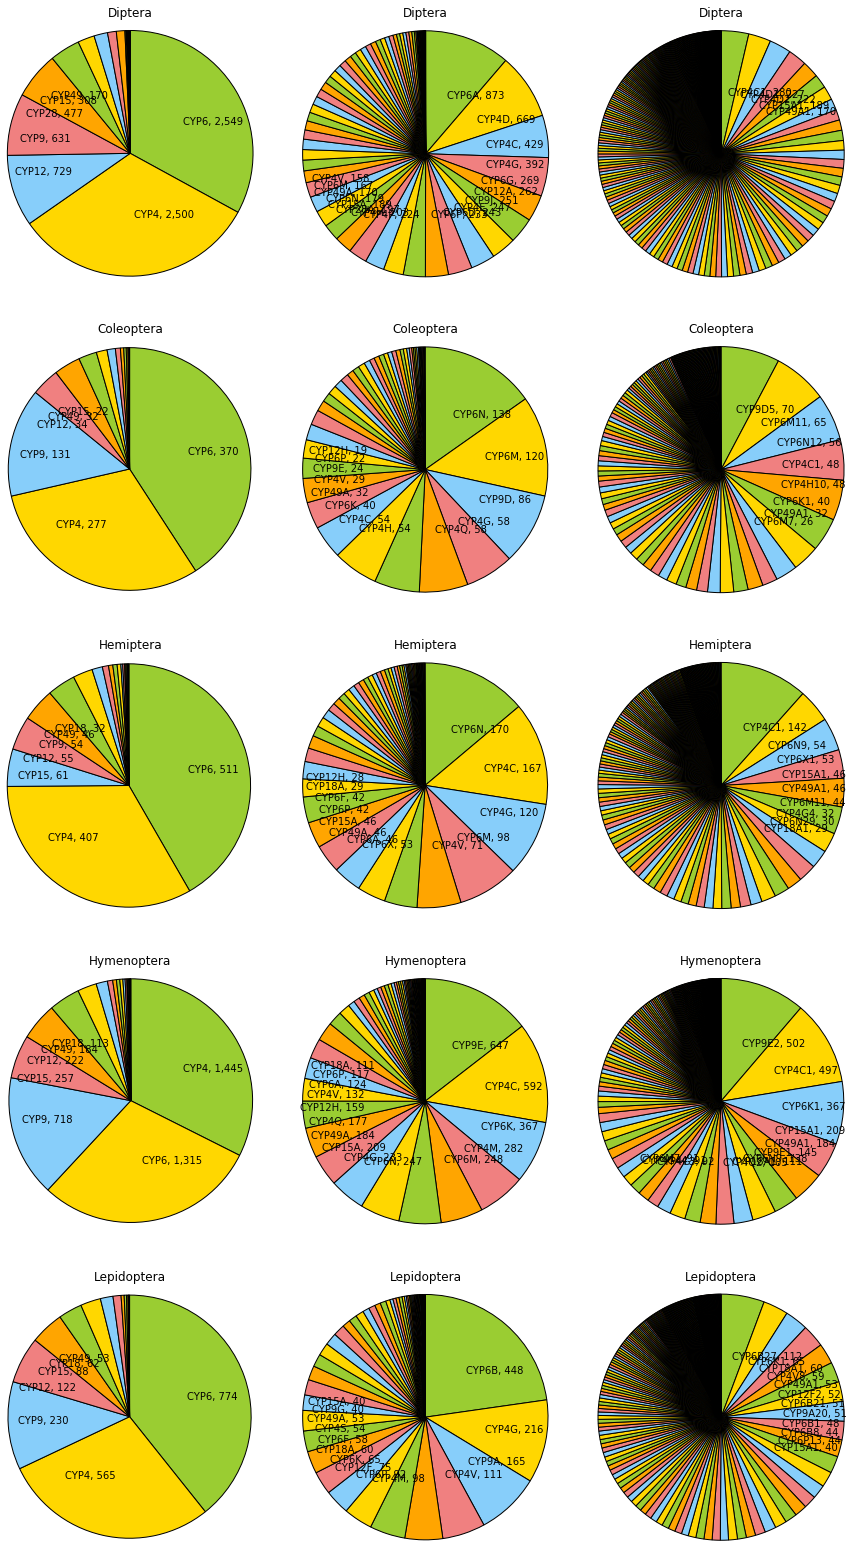

In [24]:
insect_orders = ['Diptera', 'Coleoptera', 'Hemiptera', 'Hymenoptera', 'Lepidoptera']
plt.figure(figsize=(15,10*len(insect_orders)))
index = 0
for insect_order in insect_orders:
    index += 1
    plt.subplot(len(cypd1), 3, index)
    draw_pie_chart2(insect_order, cypd1[insect_order])
    index += 1
    plt.subplot(len(cypd2), 3, index)
    draw_pie_chart2(insect_order, cypd2[insect_order])
    index += 1
    plt.subplot(len(cypd3), 3, index)
    draw_pie_chart2(insect_order, cypd3[insect_order])